## Bonus Points

##### a) Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

* First let's divide `instagram_profiles.csv` into two subsets:
  1. The first `top10_followers` containing the top 10% regarding the number of followers.
  2. The second `rest_followers` containing the remaining 90% of profiles.

In [9]:
# top10_followers

df_instagram_profiles_bp = df_instagram_profiles.copy()
df_instagram_profiles_bp.sort_values(by = 'followers', ascending = False, inplace = True)

In [11]:
top10_followers = df_instagram_profiles_bp.head(int(0.1*len(df_instagram_profiles_bp)))

In [12]:
rest_followers = df_instagram_profiles_bp.iloc[len(top10_followers):]

Let's do some work on the `instagram_post.csv`.

* We recover the list of dataset chunks `chunk_list_new` used in question RQ3. Then, we group by `profile.id` and sum over `hour` creating a new variable called `hours_sum`. We append the new chunks to a new list called `chunk_list_new3`. Lastly, we concatenate the chunks grouping by `profile_id` and summing across the `hours_sum` column therefore obtaining the `data3` dataframe.

In [13]:
chunk_list_new3 = []
for chunk in chunk_list_new:
    chunk = chunk.groupby('profile_id', as_index=False)['hour'].agg({'hours_sum': 'sum'})
    chunk_list_new3.append(chunk)
    
data3 = pd.concat(chunk_list_new3).groupby('profile_id', as_index=False)['hours_sum'].sum()

* We group by `profile.id` and count the number of profile ids in each group creating a new column called `profile_id_count`. We append the new chunks to a new list called `chunk_list_new4`. Lastly, we concatenate the chunks grouping them by `profile_id` and summing across the `profile_id_count` column therefore obtaining the `data4` dataframe.

In [14]:
# get instagram_posts dataset and group by profile id and average across hour (time)

chunk_list_new4 = []
for chunk in chunk_list_new:
    chunk = chunk.groupby('profile_id', as_index=False)['profile_id'].agg({'profile_id_count': 'count'})
    chunk_list_new4.append(chunk)
    
data4 = pd.concat(chunk_list_new4).groupby('profile_id', as_index=False)['profile_id_count'].sum()

* We create a new dataframe `df_bp_1` by concatenating the columns in `data3` and `data4`. 

In [15]:
# Concatenate the datasets 

df_bp_1 = pd.concat([data3, data4['profile_id_count']], axis = 1)

* Finally, we create a new column `average_hour` that is calculated by dividing the `hours_sum` by the `profile_id_count`.

In [16]:
# Create a new column containing the average hour 

df_bp_1['average_hour'] = df_bp_1['hours_sum']/df_bp_1['profile_id_count']

In [17]:
df_bp_1

,profile_id,hours_sum,profile_id_count,average_hour
0,3.000000e+00,153.0,14,10.928571
1,4.000000e+00,404.0,37,10.918919
2,1.100000e+01,29.0,2,14.500000
3,1.200000e+01,5.0,1,5.000000
4,1.400000e+01,17.0,1,17.000000
...,...,...,...,...
11833760,9.001013e+13,134.0,10,13.400000
11833761,9.001013e+13,4.0,1,4.000000
11833762,9.001013e+13,42.0,2,21.000000
11833763,9.001013e+13,7.0,1,7.000000


##### **Time interval distribution regarding the top 10% users with the highest number of followers**

In [36]:
# Let's start with top10 followers

top10_followers.isna().sum()
top10_followers_1 = top10_followers.copy()
top10_followers_1.dropna(subset = ['profile_id'], inplace = True)

* We perform an inner merge `top10_followers` with `df_bp_1` on `profile_id`. So, we keep only those rows (profiles) that are present in both dataframes.

In [37]:
# keep only profile ids that are in both datasets

top10_followers_merged = pd.merge(top10_followers_1, df_bp_1, on='profile_id', how='inner')

* We use the function `time_intervals` defined in question `RQ3` to plot the distribution of the time intervals. Therefore, we count the number of `average_hour` occurrences there are for each time interval and we visualize the results.

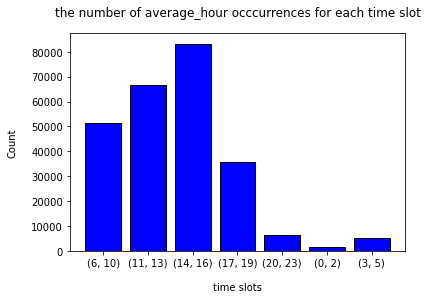

In [42]:
time_intervals(top10_followers_merged, top10_followers_merged.average_hour, slots, title = "the number of average_hour occcurrences for each time slot")

* **The mean of time intervals** is

In [43]:
np.mean(top10_followers_merged.average_hour)

13.236959396872

##### **Time interval distribution regarding the remaining 90% of users**

* We perform an inner merge `rest_followers` with `df_bp_1` on `profile_id`. So, we keep only those rows (profiles) that are present in both dataframes.

In [20]:
# Rest 90% of profile ids

rest_followers_1 = rest_followers.copy()
rest_followers_1.dropna(subset = ['profile_id'], inplace = True)

In [ ]:
rest_followers_merged = pd.merge(rest_followers_1, df_bp_1, on='profile_id', how='inner')

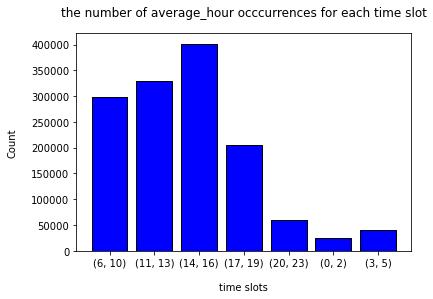

In [38]:
time_intervals(rest_followers_merged, rest_followers_merged.average_hour, slots, "the number of average_hour occcurrences for each time slot")

* **The mean of time intervals** is

In [39]:
np.mean(rest_followers_merged.average_hour)

13.102672633361614

##### `Conclusions`

It can clearly be seen that the distribution of the time intervals for the bottom 90% Instagram users (`rest_followers`) in terms of number of followers is similar to the one obtained in question `RQ3`. This could be explained by the fact that the majority (90%) of the dataset used in questin RQ3 is also present in rest_followers.

While the distribution of the time intervals for the top 10% Instagram users (`top10_followers`) is very different wrt the one obtained in question `RQ3`. The histogram is far more skewed to the left, implying that <b>the most followed users tend to post earlier in the day (6 AM - 4 PM) and especially in the 2PM-4PM slot instead of in the evening (5PM-11PM) like the majority of the sampled Instagram users.</b>
So, if you want to be more successful on Instagram, you should post in the morning and early afternoon!